<img src="https://github.com/palak-bohra/insaid-projects/blob/master/term-1/ipldata/ipl.png?raw=true" width="240" height="360" />


# Data Analysis for IPL


## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [ Which team secured most runs in IPL series?](#section401)<br/>
    - 4.2 [Who were the top three run scoring batsman in IPL?](#section402)<br/>
    - 4.3 [How did the top three batsmen performed over different seasons ?](#section403)<br/>
    - 4.4 [What are the most ways in which players got dismissed ?](#section404)<br/>
    - 4.5 [Which fielder dismissed the players most ?](#section405)<br/>
    - 4.6 [Number of centuries scored in every season](#section406)<br/>
    - 4.7 [Which players hit most sixes ?](#section407)<br/>
    - 4.8 [How many runs are more likely to occur over no ball?](#section408)<br/>
    - 4.9 [Establish correlation between different attributes of dataset?](#section409)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
# 1. Problem Statement

The notebook performs the basic data analysis on __IPL Series ball-by-ball data__ which is collected from year __2008 to 2018__. It uses the basic tools and plots the comparison in form of different graphs. 
Here we're trying to understand how the players performed over years and dedcue the top players in respective fields.


<a id=section2></a>
# 2. Data Loading and Description

The data is collected from kaggle and comprises of two different datasets. One dataset includes data of each ball played from 2008 to 2018 in IPL and another includes the basic details of match (like venue, year etc.).
- To get the better analysis, I used all the attributes of ball-by-ball dataset and merged it with match details set on the basis of match_id. 
- The final dataset includes all the description of balls played along with the __year of IPL match__.
- The final dataset includes __164750 observations over 22 columns__. Below is thh description of columns.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
|       match_id        |    Match Number    						| 
|       inning          |     Division of game in which each team has turn in batting	| 
|       batting_team    |    The batting team    					| 
|       bowling_team    |    The bowling team    					| 
|       over            |    Number of over    						| 
|       ball            |    Ball of the over    					| 
|       batsman         |    Batsman playing    					| 
|       non_striker     |    Batsman standing at bowler's end of the pitch    		| 
|       bowler          |    Person who is bowling    							| 
|       is_super_over   |    If the over is tie breaking over    			| 
|       wide_runs       |    The runs scored by batsman as penality for wide ball    	| 
|       bye_runs        |    Extra runs without the ball touching either bat or the body  | 
|       legbye_runs     |    Extra runs without the ball touching bat    							| 
|       noball_runs     |    The runs scored by batsman on no ball    			| 
|       penalty_runs    |    Total penality runs given by bowler   							| 
|       batsman_runs    |    Runs scored by batsman on one ball    			|	 
|       extra_runs      |    Extra runs sceured by batsman (like penality runs)    							| 
|       total_runs      |    Total runs scored by batsman including penality runs     	| 
|       player_dismissed|    If the batsman is dismissed    				| 
|       dismissal_kind  |    How is the batsman dismissed    				| 
|       fielder         |    The fielder who dismissed the batsman    			| 
|       season          |    The year of the match 					|

#### Importing Packages

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

#### Importing dataset

In [3]:
data_overall = pd.read_csv('https://raw.githubusercontent.com/palak-bohra/insaid-projects/master/term-1/ipldata/deliveries.csv', error_bad_lines=False, encoding='utf-8')
data_season = pd.read_csv('https://raw.githubusercontent.com/palak-bohra/insaid-projects/master/term-1/ipldata/matches.csv', error_bad_lines=False, encoding='utf-8')
data_season = data_season[['id', 'season']].rename(columns={'id':'match_id'})

match_data = pd.merge(left=data_overall, right=data_season,how='left', on='match_id')

<a id=section3></a>
# 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the dataset

In [4]:
match_data.shape                                                 # gives the shape of the dataset

(164750, 22)

In [5]:
match_data.columns                                               # lists down all the columns used in dataset

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season'],
      dtype='object')

In [6]:
match_data.info()                                              # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164750 entries, 0 to 164749
Data columns (total 22 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
seaso

In [7]:
match_data.head()                                            # Gives first 5 rows of dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2017
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,2017
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2017
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,2017


In [8]:
match_data.tail()                                 # gives last 5 rows of dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season
164745,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,5,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,4,0,4,NaN,NaN,NaN,2018
164746,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,6,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2018
164747,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,1,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2018
164748,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,2,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2018
164749,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,3,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,4,0,4,NaN,NaN,NaN,2018


In [9]:
match_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,season
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129,2012.961360
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255,3.063119
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2013.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2016.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,2018.000000


In [10]:
match_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
fielder             158832
season                   0
dtype: int64

- Here we observe that player_dismissed, dismissal_kind and fielder columns have most null values.
- This is expected behaviour as players don't get out on every ball

<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [11]:
profile = pandas_profiling.ProfileReport(match_data)
profile.to_file(outputfile="match_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __match_before_preprocessing.html__.

<a id=section303></a>
### 3.3 Preprocessing

- Dropping column __bye_runs__ as it contains most zero values and also is not useful in our data analysis.
- Dropping column __legbye_runs__ as it has most zero values and we're not using it to analyse the data.
- Dropping __total_runs__ as it is higly related to batsman_runs. 
- Dropping column __wide_runs__ as it has most zero values and we're not using it to analyse the data.
- Dropping duplicate rows.

In [12]:
match_data.drop('bye_runs', axis = 1,inplace = True)

In [13]:
match_data.drop('legbye_runs', axis = 1,inplace = True)

In [14]:
match_data.drop('total_runs', axis = 1,inplace = True)

In [15]:
match_data.drop('wide_runs', axis = 1,inplace = True)

In [16]:
match_data.drop_duplicates(subset=None, keep='first', inplace=True)

<a id=section304></a>
### 3.4 Post Profiling

In [17]:
profile = pandas_profiling.ProfileReport(match_data)
profile.to_file(outputfile="match_after_preprocessing.html")

<a id=section4></a>
# 4. Questions

<a id=section401></a>
### 4.1 Which team secured most runs in IPL series?

In [18]:
team_runs = match_data[['batting_team', 'batsman_runs']].groupby(['batting_team']).sum()
team_runs = pd.DataFrame(team_runs.to_records()).sort_values(by='batsman_runs', ascending=False)
team_runs

,batting_team,batsman_runs
7,Mumbai Indians,25487
12,Royal Challengers Bangalore,24566
4,Kings XI Punjab,24037
6,Kolkata Knight Riders,23419
2,Delhi Daredevils,23115
0,Chennai Super Kings,22631
9,Rajasthan Royals,19141
13,Sunrisers Hyderabad,13789
1,Deccan Chargers,10885
8,Pune Warriors,6040


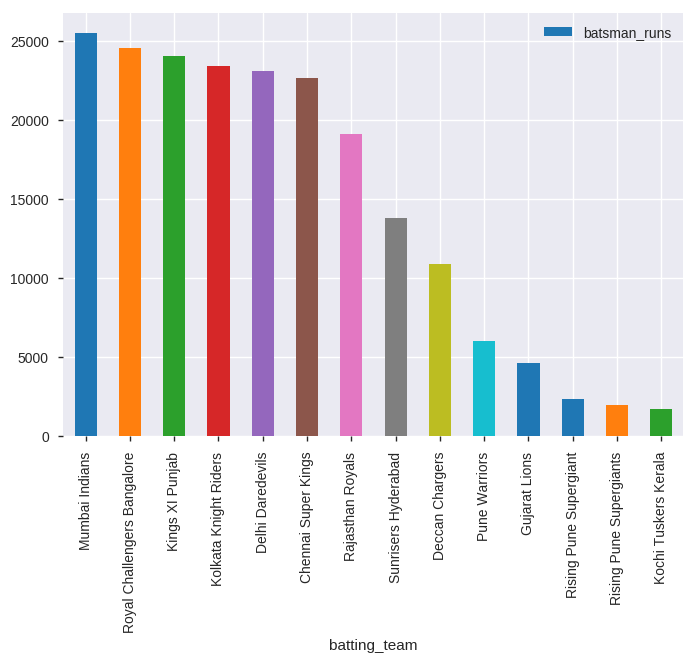

In [19]:
team_runs.plot.bar(x='batting_team', y='batsman_runs',stacked=True)

<a id=section402></a>
### 4.2 Who were the top three run scoring batsman in IPL?

In [20]:
top_batsmen = match_data[['batsman', 'batsman_runs']].groupby(['batsman']).sum().nlargest(3, 'batsman_runs')
top_batsmen

,batsman_runs
batsman,
SK Raina,5014
V Kohli,4962
RG Sharma,4504


Text(0.5, 1.0, 'Top scoring batsman in IPL')

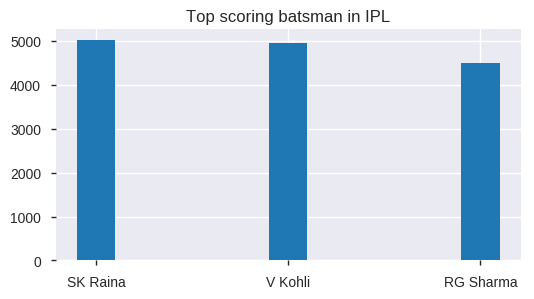

In [21]:
f, ax = plt.subplots(figsize=(6,3))
plt.bar(x=top_batsmen.index.values, height=top_batsmen['batsman_runs'], width=0.2, align='center')
plt.title('Top scoring batsman in IPL')

<a id=section403></a>
### 4.3 How did the top three batsmen performed over different seasons ?

In [22]:
top_batsmen_names = list(top_batsmen.index.get_values())
tb_performance = match_data[['batsman', 'batsman_runs', 'season']].loc[match_data['batsman'].isin(top_batsmen_names)]
tb_performance = tb_performance.groupby(['season','batsman']).sum()
tb_performance = pd.DataFrame(tb_performance.to_records())
tb_performance

,season,batsman,batsman_runs
0,2008,RG Sharma,404
1,2008,SK Raina,421
2,2008,V Kohli,165
3,2009,RG Sharma,362
4,2009,SK Raina,434
5,2009,V Kohli,246
6,2010,RG Sharma,404
7,2010,SK Raina,528
8,2010,V Kohli,307
9,2011,RG Sharma,372


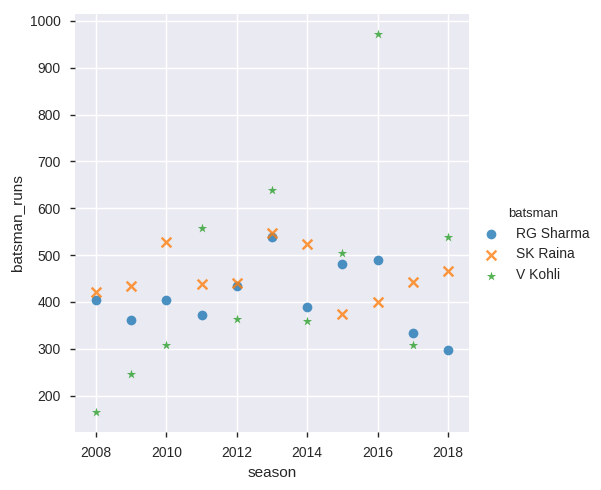

In [23]:
sns.lmplot(x='season', y='batsman_runs', hue='batsman', markers=['o', 'x', '*'],
           data=tb_performance, 
           fit_reg=False)

<a id=section404></a>
### 4.4 What are the most ways in which players got dismissed ?

In [24]:
out_data = match_data.loc[match_data['player_dismissed'].notnull()]
out_data_count = out_data.groupby(['dismissal_kind']).dismissal_kind.count()
out_data_count

dismissal_kind
bowled                   1495
caught                   4861
caught and bowled         211
hit wicket                  9
lbw                       494
obstructing the field       1
retired hurt               11
run out                   813
stumped                   262
Name: dismissal_kind, dtype: int64

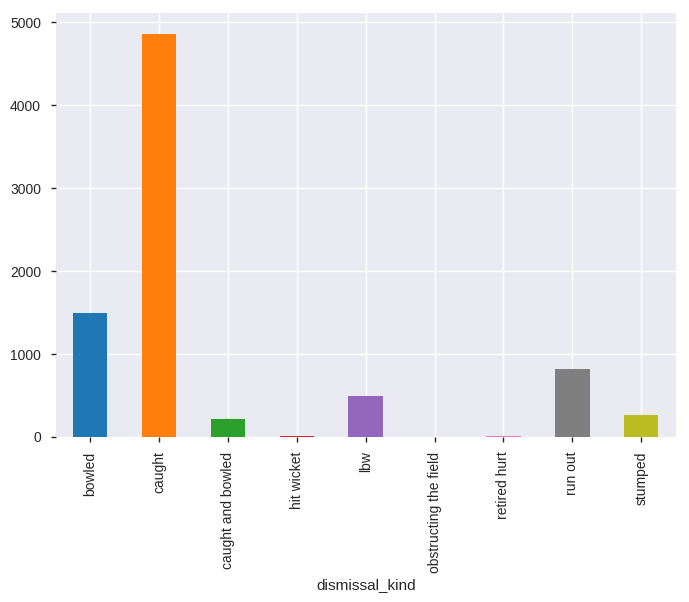

In [25]:
out_data_count.plot.bar(stacked=True)

<a id=section405></a>
### 4.5 Which fielder dismissed the players most ?

In [26]:
fielder_data = out_data.loc[match_data['fielder'].notnull()]
fielder_data = fielder_data.groupby('fielder').fielder.count().nlargest(10)
fielder_data

fielder
KD Karthik        145
MS Dhoni          142
RV Uthappa        120
AB de Villiers    108
SK Raina          107
PA Patel           88
RG Sharma          87
V Kohli            84
NV Ojha            82
WP Saha            78
Name: fielder, dtype: int64

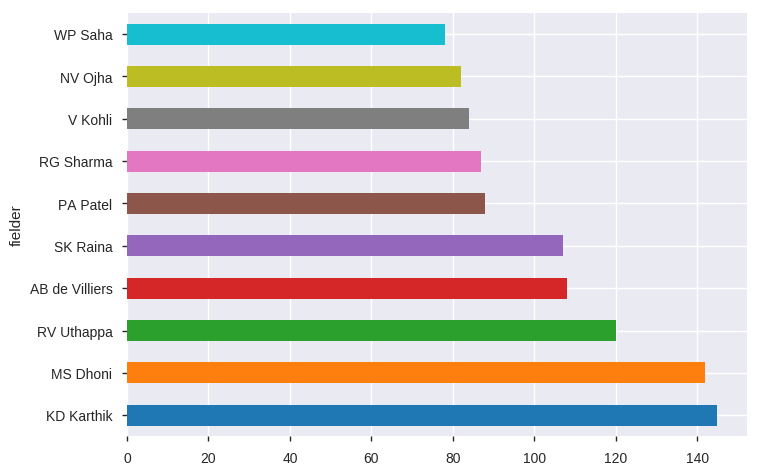

In [27]:
fielder_data.plot.barh()

<a id=section406></a>
### 4.6 Number of centuries scored in every season

In [28]:
centuries_data = match_data[['season','match_id', 'batsman_runs', 'batsman']].groupby(['season','match_id', 'batsman']).sum()
centuries_data = centuries_data.loc[centuries_data['batsman_runs'] > 100]
centuries_data['no_of_centuries'] = centuries_data['batsman_runs'] // 100
centuries_data
total_centuries = pd.DataFrame(centuries_data['no_of_centuries'].groupby('season').sum())
total_centuries['season'] = total_centuries.index.get_values()
total_centuries

,no_of_centuries,season
season,,
2008,6,2008
2009,2,2009
2010,3,2010
2011,5,2011
2012,6,2012
2013,3,2013
2014,2,2014
2015,3,2015
2016,6,2016


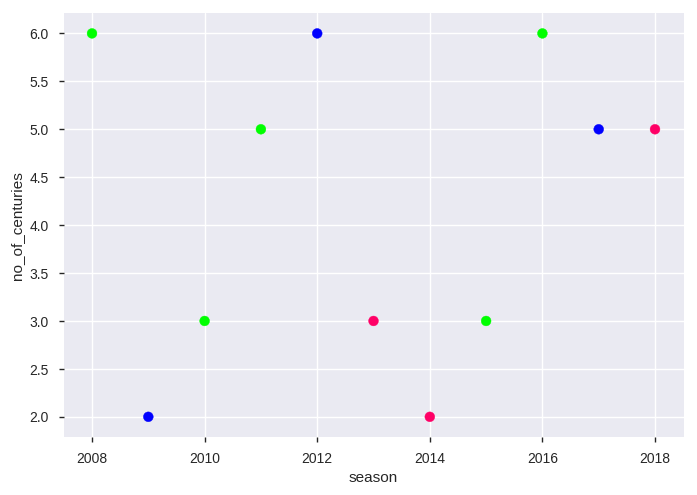

In [29]:
colors = np.array(np.random.choice(["#0000FF", "#00FF00", "#FF0066"], 11));
total_centuries.plot.scatter(x='season', y='no_of_centuries', s=50, c=colors, alpha=1)

<a id=section407></a>
### 4.7 Which players hit most sixes ?

In [30]:
# match_data
no_of_sixes = match_data[['batsman', 'batsman_runs']].loc[match_data['batsman_runs'] == 6].groupby('batsman').count().nlargest(n=10,columns='batsman_runs')
no_of_sixes

,batsman_runs
batsman,
CH Gayle,293
AB de Villiers,188
MS Dhoni,186
SK Raina,186
RG Sharma,185
V Kohli,178
DA Warner,160
YK Pathan,160
SR Watson,157


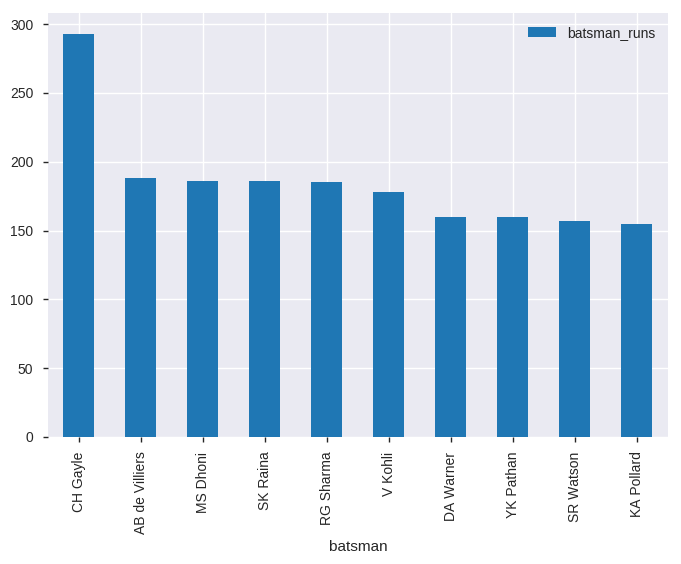

In [31]:
no_of_sixes.plot.bar()

<a id=section408></a>
### 4.8 How many runs are more likely to occur over no ball ?

In [32]:
no_ball_data = match_data.loc[match_data['noball_runs'] > 0]
no_ball_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,noball_runs,penalty_runs,batsman_runs,extra_runs,player_dismissed,dismissal_kind,fielder,season
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,1,0,0,1,NaN,NaN,NaN,2017
182,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,1,KM Jadhav,TM Head,MC Henriques,0,1,0,1,1,NaN,NaN,NaN,2017
1440,7,1,Kolkata Knight Riders,Mumbai Indians,3,3,CA Lynn,G Gambhir,JJ Bumrah,0,1,0,1,1,NaN,NaN,NaN,2017
1443,7,1,Kolkata Knight Riders,Mumbai Indians,3,6,CA Lynn,G Gambhir,JJ Bumrah,0,1,0,1,1,NaN,NaN,NaN,2017
1545,7,1,Kolkata Knight Riders,Mumbai Indians,20,2,MK Pandey,SP Narine,MJ McClenaghan,0,1,0,4,1,NaN,NaN,NaN,2017
2192,10,1,Sunrisers Hyderabad,Mumbai Indians,13,4,S Dhawan,DJ Hooda,KH Pandya,0,1,0,1,1,NaN,NaN,NaN,2017
2442,11,1,Kings XI Punjab,Kolkata Knight Riders,14,4,DA Miller,WP Saha,C de Grandhomme,0,1,0,0,1,NaN,NaN,NaN,2017
2443,11,1,Kings XI Punjab,Kolkata Knight Riders,14,5,DA Miller,WP Saha,C de Grandhomme,0,1,0,6,1,NaN,NaN,NaN,2017
2699,12,1,Royal Challengers Bangalore,Mumbai Indians,18,6,KM Jadhav,P Negi,JJ Bumrah,0,1,0,1,1,NaN,NaN,NaN,2017
3357,15,1,Delhi Daredevils,Kings XI Punjab,7,4,SW Billings,SV Samson,KC Cariappa,0,1,0,0,1,NaN,NaN,NaN,2017


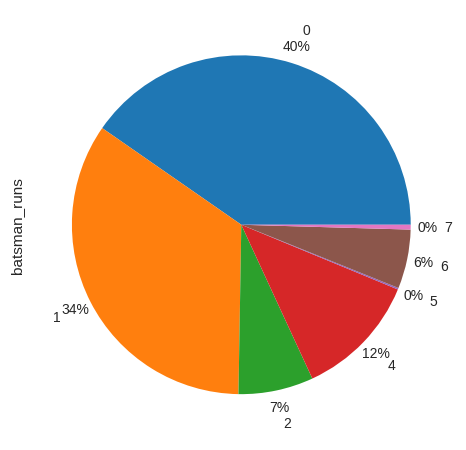

In [33]:
no_ball_data['batsman_runs'].value_counts().sort_index().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

<a id=section409></a>
### 4.9 Establish correlation between different attributes of dataset

Text(0.5, 1.0, 'Correlation between features')

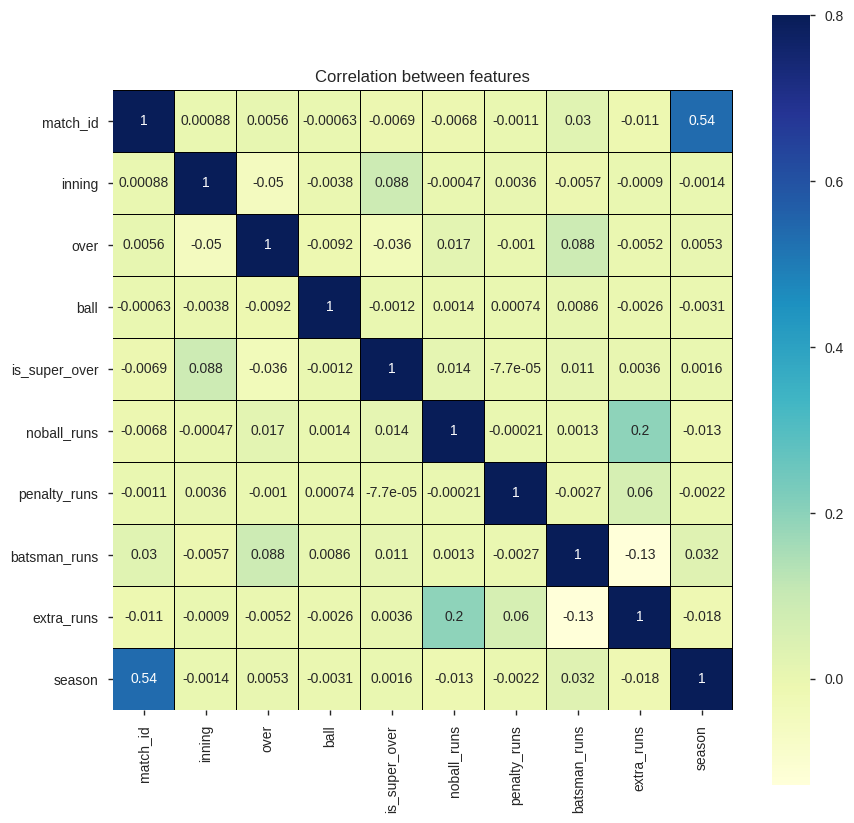

In [34]:
corr = match_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

 - Batsman run is slightly positively correlated to over. 
 - Batsman run is slightly positively correlated to season. 

<a id=section5></a>
# 5. Conclusions

- Mumbai Indians secured most runs in IPL series.
- SK Raina secured most runs in IPL series.
- Chris Gayle played highest number of sixes.
- Most of the players got out by getting caught.
- KD Karthik served as best fielder till 2018 IPL.
- 2008, 2012 and 2016 saw most number of centuries - 6.
- 40% of the players could't score any runs on no ball.
- With increase in over, batsmen tend to score more runs.
- Batsmen's performance got slightly better over seasons.